# EDA On Haberman's Survival Data Set

### Description

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

### Data & Columns
- Number of Instances: 306
- Number of Attributes: 4 (including the class attribute)
    1.  Age of patient at time of operation (numerical)
    2. Patient's year of operation (year - 1900, numerical)
    3. Number of positive axillary nodes detected (numerical)
    4. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
- Missing Attribute Values: None

In [5]:
# import required libraries and setup configuration for this notebook
# for dealing with arrays and dataframes
import pandas as pd
import numpy as np
# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# IPython's-rich-display-system
from IPython.display import display

In [6]:
# read the dataset
df = pd.read_csv('haberman.csv')

In [7]:
df.head()

30  64   1  1.1
0  30  62   3    1
1  30  65   0    1
2  31  59   2    1
3  31  65   4    1
4  33  58  10    1

The CSV file doesn't include the headers, so we will have to manually add them, refering to https://www.kaggle.com/gilsousa/habermans-survival-data-set we are adding 4 column names, age, year, nodes and survival status

In [23]:
df = pd.read_csv('haberman.csv', names=['age', 'year','nodes','status'], header=None)

In [24]:
df.head()

age  year  nodes  status
0   30    64      1       1
1   30    62      3       1
2   30    65      0       1
3   31    59      2       1
4   31    65      4       1

Now that we have columns defined, let's see what is the inffered type of each column in the dataset

In [25]:
df.dtypes

age       int64
year      int64
nodes     int64
status    int64
dtype: object

In [26]:
df['status'] = df['status'].astype('category')
df.dtypes

age          int64
year         int64
nodes        int64
status    category
dtype: object

## Univariate Analysis

Method to perform uni-variate analysis will depend on whether the variable type is categorical or continuous

In this dataset,
Age, Year and Nodes are continuous variables, so let's take at them first

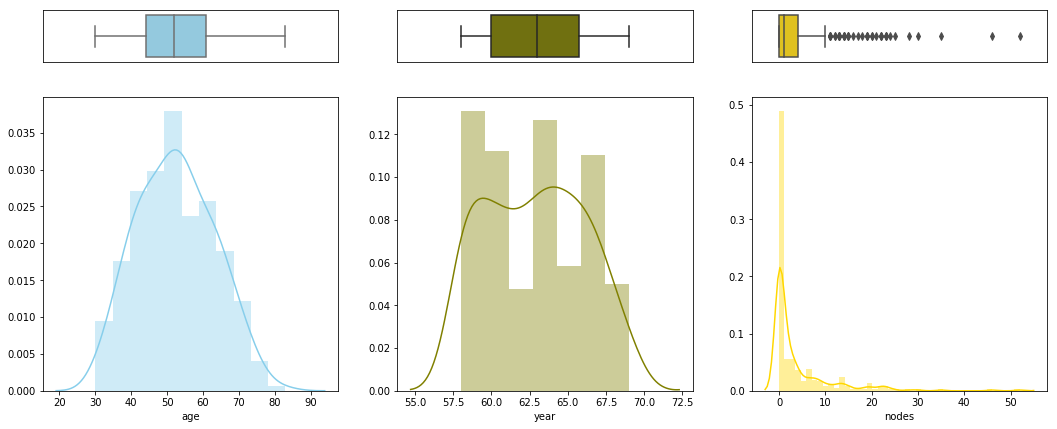

In [120]:
# plot
f, (boxplots_ax, distplot_ax) = plt.subplots(2, 3, figsize=(18, 7), sharex= 'col', gridspec_kw={"height_ratios": (.15, .85)})

for ax in boxplots_ax:
    ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=False)

sns.boxplot( df["age"] , color="skyblue", ax=boxplots_ax[0]).set(xlabel='')
sns.boxplot( df["year"] , color="olive", ax=boxplots_ax[1]).set(xlabel='')
sns.boxplot( df["nodes"] , color="gold", ax=boxplots_ax[2]).set(xlabel='')
sns.distplot( df["age"] , color="skyblue", ax=distplot_ax[0])
sns.distplot( df["year"] , color="olive", ax=distplot_ax[1])
sns.distplot( df["nodes"] , color="gold", ax=distplot_ax[2])

From the above plot, we can see that
1. The age variable is normally distributed
2. The year variable is also somewhat normally distributed
3. The nodes variable has a highly skewed distribution, most values are arround 0, it has many outliers

(array([225.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  81.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

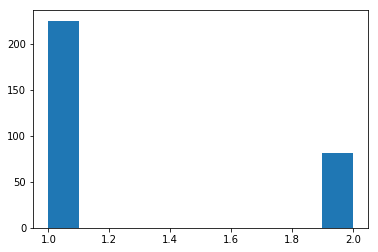

In [122]:
plt.hist(x=df['status'])

[66.66666667 66.66666667 85.71428571 88.46153846 69.56521739 73.33333333
 74.19354839 53.57142857 78.57142857 84.         76.92307692 63.63636364]
[33.33333333 33.33333333 14.28571429 11.53846154 30.43478261 26.66666667
 25.80645161 46.42857143 21.42857143 16.         23.07692308 36.36363636]


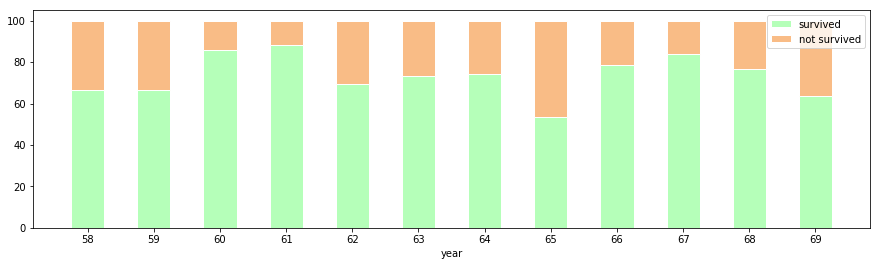

In [13]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
r = []
totals = []
survived = []
not_survived = []
for name,group in df_m.groupby('year'):
    total = group['status'].count();
    not_survived_count = group[group['status']==2]['status'].count();
    survived_count = group[group['status']==1]['status'].count();
    r.append(name)
    totals.append(total)
    survived.append(survived_count)
    not_survived.append(not_survived_count)

 
survived_percentage = np.array(survived)/np.array(totals)*100
not_survived_percentage = np.array(not_survived)/np.array(totals)*100

print(survived_percentage)
print(not_survived_percentage)

# plot
barWidth = 0.50
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111)
# Create green Bars
bar1=plt.bar(r, survived_percentage, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
bar2=plt.bar(r, not_survived_percentage, bottom=survived_percentage, color='#f9bc86', edgecolor='white', width=barWidth)

 
plt.xlabel("year")
plt.legend((bar1, bar2), ('survived', 'not survived'))
plt.xticks(r)
 # Show graphic
plt.show()

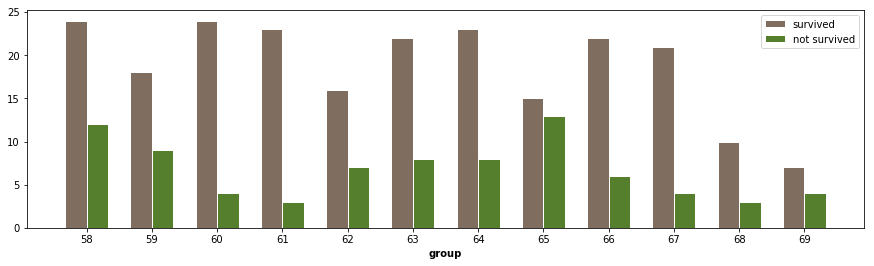

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
r = []
totals = []
survived = []
not_survived = []
for name,group in df_m.groupby('year'):
    total = group['status'].count();
    not_survived_count = group[group['status']==2]['status'].count();
    survived_count = group[group['status']==1]['status'].count();
    r.append(name)
    totals.append(total)
    survived.append(survived_count)
    not_survived.append(not_survived_count)

 
# set width of bar
barWidth = 0.33
 # Set position of bar on X axis
r1 = r
r2 = [x + barWidth for x in r1]

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111)

# Make the plot
plt.bar(r1, survived, color='#7f6d5f', width=barWidth, edgecolor='white', label='survived')
plt.bar(r2, not_survived, color='#557f2d', width=barWidth, edgecolor='white', label='not survived')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r2 + barWidth/2 for r2 in r],r)

 
# Create legend & Show graphic
plt.legend()
plt.show()


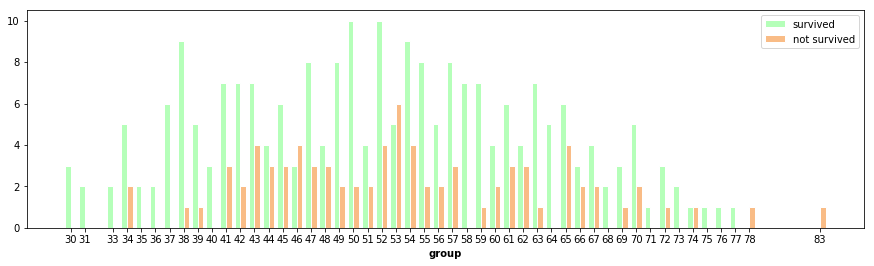

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
r = []
totals = []
survived = []
not_survived = []
for name,group in df_m.groupby('age'):
    total = group['status'].count();
    not_survived_count = group[group['status']==2]['status'].count();
    survived_count = group[group['status']==1]['status'].count();
    r.append(name)
    totals.append(total)
    survived.append(survived_count)
    not_survived.append(not_survived_count)

 
# set width of bar
barWidth = 0.40
 # Set position of bar on X axis
r1 = r
r2 = [x + barWidth for x in r1]

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111)
# Make the plot
plt.bar(r1, survived, color='#b5ffb9', width=barWidth, edgecolor='white', label='survived')
plt.bar(r2, not_survived, color='#f9bc86', width=barWidth, edgecolor='white', label='not survived')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r2 + barWidth/2 for r2 in r],r)


# Create legend & Show graphic
plt.legend()
plt.show()


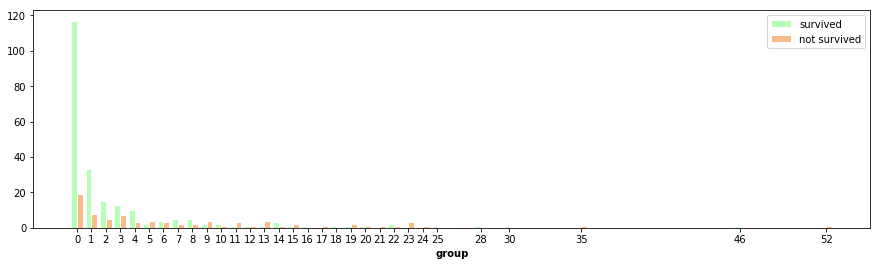

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
r = []
totals = []
survived = []
not_survived = []
for name,group in df_m.groupby('nodes'):
    total = group['status'].count();
    not_survived_count = group[group['status']==2]['status'].count();
    survived_count = group[group['status']==1]['status'].count();
    r.append(name)
    totals.append(total)
    survived.append(survived_count)
    not_survived.append(not_survived_count)

 
# set width of bar
barWidth = 0.40
 # Set position of bar on X axis
r1 = r
r2 = [x + barWidth for x in r1]

fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111)
# Make the plot
plt.bar(r1, survived, color='#b5ffb9', width=barWidth, edgecolor='white', label='survived')
plt.bar(r2, not_survived, color='#f9bc86', width=barWidth, edgecolor='white', label='not survived')
 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r2 + barWidth/2 for r2 in r],r)


# Create legend & Show graphic
plt.legend()
plt.show()


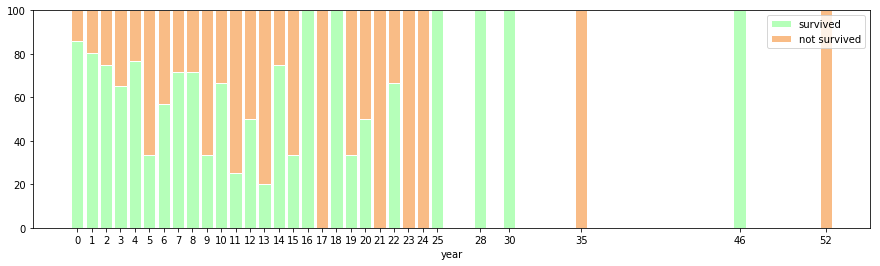

In [17]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
r = []
totals = []
survived = []
not_survived = []
for name,group in df_m.groupby('nodes'):
    total = group['status'].count();
    not_survived_count = group[group['status']==2]['status'].count();
    survived_count = group[group['status']==1]['status'].count();
    r.append(name)
    totals.append(total)
    survived.append(survived_count)
    not_survived.append(not_survived_count)

 
survived_percentage = np.array(survived)/np.array(totals)*100
not_survived_percentage = np.array(not_survived)/np.array(totals)*100


# plot
barWidth = 0.85
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111)
# Create green Bars
bar1=plt.bar(r, survived_percentage, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
bar2=plt.bar(r, not_survived_percentage, bottom=survived_percentage, color='#f9bc86', edgecolor='white', width=barWidth)

 
plt.xlabel("year")
plt.legend((bar1, bar2), ('survived', 'not survived'))
plt.xticks([r2 for r2 in r],r)

 # Show graphic
plt.show()


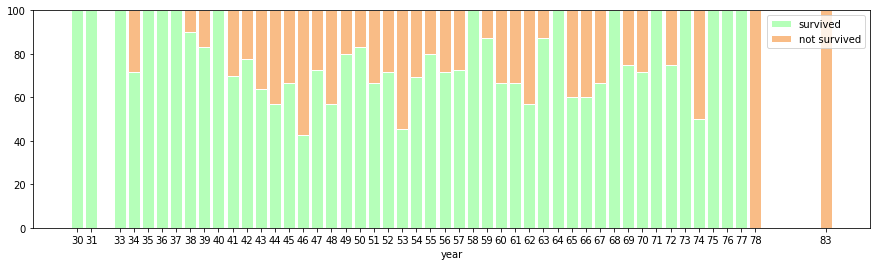

In [18]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
 
r = []
totals = []
survived = []
not_survived = []
for name,group in df_m.groupby('age'):
    total = group['status'].count();
    not_survived_count = group[group['status']==2]['status'].count();
    survived_count = group[group['status']==1]['status'].count();
    r.append(name)
    totals.append(total)
    survived.append(survived_count)
    not_survived.append(not_survived_count)

 
survived_percentage = np.array(survived)/np.array(totals)*100
not_survived_percentage = np.array(not_survived)/np.array(totals)*100


# plot
barWidth = 0.85
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111)
# Create green Bars
bar1=plt.bar(r, survived_percentage, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create orange Bars
bar2=plt.bar(r, not_survived_percentage, bottom=survived_percentage, color='#f9bc86', edgecolor='white', width=barWidth)

 
plt.xlabel("year")
plt.legend((bar1, bar2), ('survived', 'not survived'))
plt.xticks([r2 for r2 in r],r)

 # Show graphic
plt.show()


In [19]:
from collections import defaultdict
from random import shuffle

def draw_chart(data,groupby_category='nodes', target_category='status', sns_color_palette ="Paired"):
    current_palette = sns.color_palette(sns_color_palette).as_hex();
    # plot
    barWidth = 0.85
    fig = plt.figure(figsize=(15,4))
    ax = fig.add_subplot(111)
    
    r = []
    d = defaultdict(list)
    category_unique_values = data[target_category].unique();
    for name,group in data.groupby(groupby_category):
        total = group[target_category].count();
        r.append(name)
        for item in category_unique_values:
            d[item].append(
                    group[group[target_category]==item][target_category].count()/total*100
            )
    
    current_total=np.zeros((len(r)))
    for index, (key, values) in enumerate(d.items()):
        plt.bar(r, values, bottom=current_total, color=current_palette[index % len(current_palette)], width=barWidth, edgecolor='white', label=key)
        current_total = current_total + values
    
    plt.xlabel(groupby_category)
    plt.ylabel('percentage share')
    plt.legend()
    plt.xticks(r)

     # Show graphic
    plt.show()


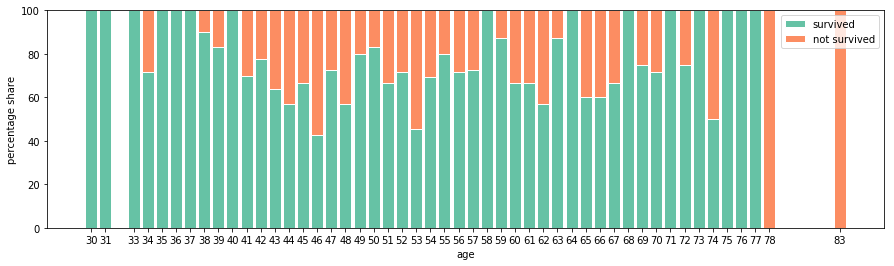

In [20]:
df_m['status_name'] = df_m.apply(lambda row: 'survived' if row.status == 1 else 'not survived', axis=1)
draw_chart(groupby_category='age',target_category='status_name', data=df_m, sns_color_palette='Set2')

In [30]:
from collections import defaultdict
from random import shuffle

def draw_chart(data,groupby_category='nodes', target_category='status', sns_color_palette ="Paired"):
    current_palette = sns.color_palette(sns_color_palette).as_hex();
    # plot
    barWidth = 0.25
    fig = plt.figure(figsize=(15,4))
    ax = fig.add_subplot(111)
    
    r = []
    d = defaultdict(list)
    category_unique_values = data[target_category].unique();
    for name,group in data.groupby(groupby_category):
        total = group[target_category].count();
        r.append(name)
        for item in category_unique_values:
            d[item].append(
                    group[group[target_category]==item][target_category].count()/total*100
            )
    
    r_index = r
    for index, (key, values) in enumerate(d.items()):
        plt.bar(r_index, values, color=current_palette[index % len(current_palette)], width=barWidth, edgecolor='white', label=key)
        r_index = np.array(r_index) + barWidth
    
    
    plt.xlabel(groupby_category)
    plt.ylabel('percentage share')
    plt.xticks([r2 + barWidth/len(category_unique_values) for r2 in r],r)
    plt.legend()

     # Show graphic
    plt.show()


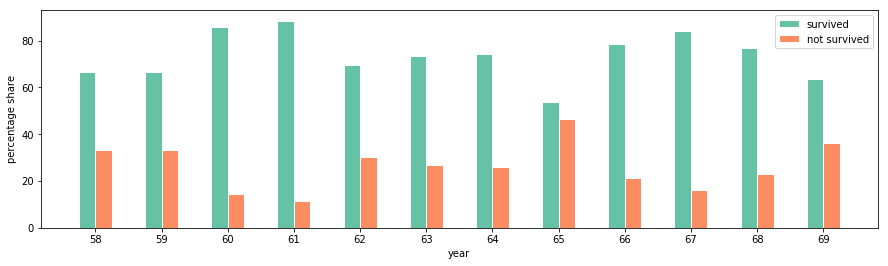

In [31]:
df_m['status_name'] = df_m.apply(lambda row: 'survived' if row.status == 1 else 'not survived', axis=1)
draw_chart(groupby_category='year',target_category='status_name', data=df_m, sns_color_palette='Set2')

In [34]:
from collections import defaultdict
from random import shuffle

def draw_chart(data,groupby_category='nodes', target_category='status', sns_color_palette ="Paired"):
    current_palette = sns.color_palette(sns_color_palette).as_hex();
    # plot
    barWidth = 0.25
    fig = plt.figure(figsize=(15,4))
    ax = fig.add_subplot(111)
    
    r = []
    d = defaultdict(list)
    category_unique_values = data[target_category].unique();
    for name,group in data.groupby(groupby_category):
        total = group[target_category].count();
        r.append(name)
        for item in category_unique_values:
            d[item].append(
                    group[group[target_category]==item][target_category].count()
            )
    
    current_total=np.zeros((len(r)))
    for index, (key, values) in enumerate(d.items()):
        plt.bar(r, values, bottom=current_total, color=current_palette[index % len(current_palette)], width=barWidth, edgecolor='white', label=key)
        current_total = current_total + values
    
    plt.xlabel(groupby_category)
    plt.ylabel('percentage share')
    plt.legend()
    plt.xticks(r)

     # Show graphic
    plt.show()


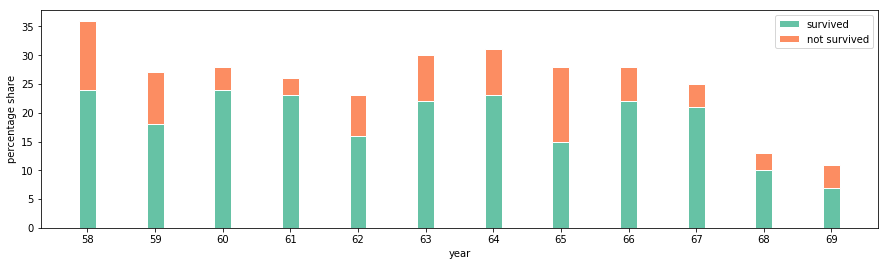

In [59]:
df_m['status_name'] = df_m.apply(lambda row: 'survived' if row.status == 1 else 'not survived', axis=1)
draw_chart(groupby_category='year',target_category='status_name', data=df_m, sns_color_palette='Set2')